In [1]:
import pandas as pd
import numpy as np
import re

pd.options.display.max_columns = None

### `Question-1:`

The dataset is based on NFTs. This is quite large. So, when you will read the dataset, you have to wait. The link of the dataset: https://tinyurl.com/2pfhncqw

Your task is to make a pivote table by using the columns "verification_status", "contract_type", "rarity_score" and "last_sale_price" to find out the total values.

In [2]:
# code here
df = pd.read_csv('nfts.csv')
df.head()

,Unnamed: 0,rarity_score,last_sale_date,last_sale_price,total_supply,creation_date,verification_status,n_of_traits,contract_type,seller_fees,platform_fees,openrarity_enabled,has_website,has_own_twitter,has_discord,has_medium,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets
0,0,2.000000,2022-11,1.266732,1,2022-04,verified,2,own,1000.0,250,False,False,True,True,False,31,187.967742,8.290323,60.935484,0,0,2,591,28,380
1,1,97.077216,2021-08,1.200357,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
2,2,139.453086,2022-08,3.180572,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
3,3,127.753445,2021-08,3.502910,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239
4,4,112.315719,2022-09,4.009567,8888,2021-07,verified,5,own,500.0,250,False,False,True,True,False,11,133.181818,13.454545,55.181818,0,0,7,402,47,239


In [10]:
df.pivot_table(index="verification_status", columns="contract_type", values=["rarity_score","last_sale_price"],aggfunc={'last_sale_price':'sum','rarity_score':'mean'}, margins=True)

last_sale_price                                \
contract_type               default            own            All   
verification_status                                                 
approved                 658.931935    1684.819488    2343.751423   
verified                 370.304092  667394.862655  667765.166747   
All                     1029.236027  669079.682143  670108.918170   

                    rarity_score                           
contract_type            default         own          All  
verification_status                                        
approved             3296.041909  393.000000  3073.676994  
verified              125.845700  260.837580   246.036413  
All                  2851.357948  268.624713  1437.092531

### `Question-2:`

You are given a dataset about the cars' price and miles driven of different cars throughout the different years. The link of the dataset: https://tinyurl.com/2r24n45l. Your tasks are
- make a pivot table of the brands (the required brands are given below) from the "Year" 2018 to the year 2022 in which the "Price" is shown as average values and "Miles" are in median values. In this pivote table, every row represents a particular brand and each column represents either average "Price" of a partucular year or median values of "Miles" of a particular year.
- At the end plot a kde chart for the "Price" and "Miles" by using your pivot table.

There are some challenges to solve this task:
- There is no column that  represent the brand name of the car. You have to find out on your own.
- Some values of "Years" column are misleading. You have to reset this column too that every value should tell a valid meaning.

In [34]:
# code here
df = pd.read_csv('carvana.csv')
df.head()

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990


In [40]:
df['Year'] = df['Year'].astype('str').str[:4].astype('int')

In [46]:
df['Brand'] = df['Name'].str.split(' ').str.get(0)
df.head()

,Name,Year,Miles,Price,Brand
0,Chevrolet Trax,2018,41946,16990,Chevrolet
1,GMC Terrain,2020,45328,23990,GMC
2,Jeep Wrangler,2012,81068,21590,Jeep
3,Jeep Renegade,2019,35372,21590,Jeep
4,BMW X,2017,68992,22990,BMW


<AxesSubplot:ylabel='Density'>

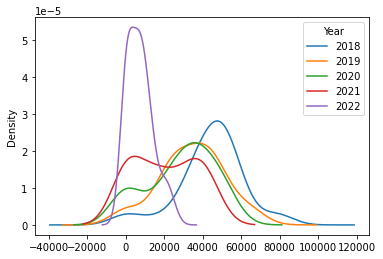

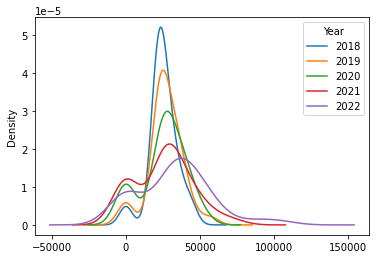

In [60]:
year = df[df['Year'].between(2018,2022)]
final_df = year.pivot_table(index='Brand',columns='Year', values=['Price','Miles'],aggfunc={'Price':'mean','Miles':'median'},fill_value=0)
final_df['Miles'].plot(kind='kde')
final_df['Price'].plot(kind='kde')

### `Question-3:`

You are given a dataset of **Daily Power Generation in India** of regional wise of all Power Stations. Link of the dataset: https://tinyurl.com/2nq6kugt

Task
- In this dataset, there are many columns. Two of them are `Actual(MU)` and `Excess(+) / Shortfall (-)`. `Actual(MU)` represents the actual power generation. `Excess(+) / Shortfall (-)` tells is that generated power is excess or shortfall for that particular day of a power station. You have to find out what should be the actual power generation required for that day by the power stations that there would not be any excess or shorfall power. For the result, make a new column.
- Find out the month of the day and store it as a new column.
- Find out top 10 frequently appeared power stations in this dataframe.
- Next create a pivot table of which every row represents a power station and every column represents a month in a order. Like January, February, March...
- It is hard to get insight if you look through the only pivot table. So plot the pivot table.

In [2]:
# code here
df = pd.read_csv('PowerGeneration.csv')
df.head()

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0


In [10]:
df['Dates'] = pd.to_datetime(df['Dates'])
df['Month'] = df['Dates'].dt.month_name()

In [13]:
df['Power Station'].value_counts().head(10)

NTPC Ltd.    9570
NHPC         5742
NPCIL        5742
GMR ENERG    5742
JSWEL        3828
TATA PCL     3828
IBPIL        3828
APL          3828
JPPVL        3828
NLC          3828
Name: Power Station, dtype: int64

In [71]:
sort_order=['January','February','March','April','May','June','July','August','September','October','November','December']
final = df.pivot_table(index='Power Station',columns='Month',values='Actual(MU)').sort_index(axis=1,key=lambda x: pd.Categorical(x,categories=sort_order))
final

Month,January,February,March,April,May,June,July,August,September,October,November,December
Power Station,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.925000,NaN,NaN
ABAN POWR,0.870968,0.843972,1.130841,0.600000,0.798387,0.886667,1.058442,0.780645,0.783333,0.945455,0.821229,0.858757
ACB,3.754839,4.397163,4.654206,4.225000,4.290323,4.600000,4.175325,3.812903,3.450000,4.006061,4.480447,4.265537
ACPL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ADHPL,0.000000,0.000000,0.051402,0.608333,1.298387,2.633333,4.194805,3.761290,2.100000,0.945455,0.011173,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
VESPL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
VIP,2.561290,1.191489,1.485981,1.466667,1.491935,1.353333,1.389610,1.006452,3.261111,3.163636,3.083799,3.451977
VVL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<AxesSubplot:ylabel='Density'>

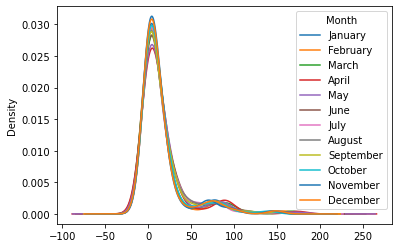

In [81]:
final.plot(kind='kde')

###`Q-4` You are given a file `question-answer.csv`. Your task is to make a dataframe from it with two columns - `question` and `answers`.

* Questions in the file start from `Q<number>`; E.g.  `Q1` denotes question no. `1`
* Answers starts from `Ans<number>`; Eg. `Ans1` denotes answer of question no `1`
* MAke sure you look at columns name carefully

CSV File - "https://drive.google.com/file/d/10rmV3XrVtzpDTtYZF3UtCdcU0ajBJjGY/view?usp=share_link"

In [83]:
# code here
df = pd.read_csv("question-answer.csv")
df.head()

,Unnamed: 0,2
0,0,Q1-What is Data Science?
1,1,"Ans1-Data Science combines statistics, maths, ..."
2,2,Q2-2. How is logistic regression done?
3,3,Ans2-Logistic regression measures the relation...
4,4,Q3-How do you build a random forest model?


In [95]:
final=pd.DataFrame()
final['Questions'] = df['2'][::2].to_list()
final['Answers'] = df['2'][1::2].to_list()
final

,Questions,Answers
0,Q1-What is Data Science?,"Ans1-Data Science combines statistics, maths, ..."
1,Q2-2. How is logistic regression done?,Ans2-Logistic regression measures the relation...
2,Q3-How do you build a random forest model?,Ans3-A random forest is built up of a number o...
3,Q4-How can you avoid overfitting your model?,Ans4-Overfitting refers to a model that is onl...
4,Q5-You are given a data set consisting of vari...,Ans5-The following are ways to handle missing ...
5,Q6-What is bag of words? How we can use it for...,Ans6-Bag of Words is a representation of text ...
6,Q7-How can we use machine learning for text cl...,Ans7-Machine learning classification algorithm...
7,Q8-What is a time series?,Ans8-A time series is a set of observations or...
8,Q9-How is time series different from the usual...,Ans9-The principle behind causal forecasting i...
9,Q10-What are the different types of joins? Wha...,Ans10-(INNER) JOIN: Returns records that have ...


###`Q-5`: Print Question and answer of those questions which does not contains any question mark (`?`).


In [107]:
# code here

final[final['Questions'].str.contains('^[?]')]

,Questions,Answers


###`Q 6-10` LOG and EMPLOYEE

6. Show `activity` details month wise. Show count for each `activity`
7. Find employee who did most `activity` in January month.
8. Employee who have worked most no of times on Weekends.
9. Which activity is logged most on buisness days.
10. Week Days wise activity table.


Note(for common field):- Employee file has `EMPLOYEE_ID` and LOG file has `emp_id`

In [3]:
# code here
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")

In [4]:
temp_df = log_file.merge(employee,left_on='emp_id',right_on='EMPLOYEE_ID')
temp_df.head()

,Log_ID,dt,dept,emp_id,activity,eqpt,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,1000,2022-01-07,Dept6,115,Cleaning,UPS,115,Alexander,Khoo,AKHOO
1,1038,2022-02-14,Dept2,115,Cleaning,Fan,115,Alexander,Khoo,AKHOO
2,1048,2022-02-24,Dept4,115,Repair,CPU,115,Alexander,Khoo,AKHOO
3,1114,2022-05-01,Dept1,115,Repair,Battery,115,Alexander,Khoo,AKHOO
4,1293,2022-10-27,Dept4,115,Checking,CPU,115,Alexander,Khoo,AKHOO


In [5]:
temp_df['dt'] = pd.to_datetime(temp_df['dt'])
temp_df['month'] = temp_df['dt'].dt.month_name()
temp_df

,Log_ID,dt,dept,emp_id,activity,eqpt,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,month
0,1000,2022-01-07,Dept6,115,Cleaning,UPS,115,Alexander,Khoo,AKHOO,January
1,1038,2022-02-14,Dept2,115,Cleaning,Fan,115,Alexander,Khoo,AKHOO,February
2,1048,2022-02-24,Dept4,115,Repair,CPU,115,Alexander,Khoo,AKHOO,February
3,1114,2022-05-01,Dept1,115,Repair,Battery,115,Alexander,Khoo,AKHOO,May
4,1293,2022-10-27,Dept4,115,Checking,CPU,115,Alexander,Khoo,AKHOO,October
...,...,...,...,...,...,...,...,...,...,...,...
290,1218,2022-08-13,Dept3,111,Cleaning,Generator,111,Ismael,Sciarra,ISCIARRA,August
291,1238,2022-09-02,Dept4,111,Inspection,AC,111,Ismael,Sciarra,ISCIARRA,September
292,1274,2022-10-08,Dept4,111,Checking,CPU,111,Ismael,Sciarra,ISCIARRA,October
293,1343,2022-12-16,Dept1,111,Cleaning,UPS,111,Ismael,Sciarra,ISCIARRA,December


In [6]:
temp_df.groupby(['month','activity'])['activity'].count().unstack()

activity,Checking,Cleaning,Inspection,Repair
month,,,,
April,3,9,7,2
August,7,9,9,4
December,5,4,7,5
February,4,6,4,10
January,6,9,7,5
July,5,5,10,2
June,4,5,8,9
March,6,4,4,12
May,4,7,6,8


In [7]:
emp = temp_df[temp_df['month']=='January']
emp.groupby(['emp_id'])['activity'].count().sort_values(ascending=False).head(1)

emp_id
122    3
Name: activity, dtype: int64

In [8]:
temp_df['day_name'] = temp_df['dt'].dt.day_name()
emp = temp_df[temp_df['day_name'].isin(['Saturday','Sunday'])]
emp.groupby(['emp_id'])['activity'].count().sort_values(ascending=False).head(1)

emp_id
109    5
Name: activity, dtype: int64

In [9]:
temp_df[temp_df['dt'].dt.dayofweek < 5]['activity'].value_counts().sort_values().tail(1)

Inspection    62
Name: activity, dtype: int64

In [10]:
days_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
temp_df.groupby(['month','day_name','activity'])['activity'].count().unstack()

activity             Checking  Cleaning  Inspection  Repair
month     day_name                                         
April     Friday          NaN       1.0         1.0     NaN
          Monday          1.0       2.0         1.0     NaN
          Saturday        NaN       NaN         1.0     1.0
          Sunday          1.0       1.0         NaN     1.0
          Thursday        NaN       3.0         1.0     NaN
...                       ...       ...         ...     ...
September Saturday        2.0       NaN         1.0     1.0
          Sunday          NaN       NaN         3.0     NaN
          Thursday        3.0       NaN         1.0     1.0
          Tuesday         1.0       NaN         1.0     2.0
          Wednesday       NaN       NaN         1.0     1.0

[84 rows x 4 columns]

### `Q-11`:

1. There are missing value in first name of employee. Fill it using email and last name field.

> E.g- `email` -> JMURMAN and `last_name` -> 'Urman' -> so make it's first name as 'JM', Sort of (Email- lastname).

> Email is constructed from initials of first name concate with lastname. Your Task is to fill first name initials in missing data.

2. You can see email field don't have any domain name. Change this to full email addreess with domain as 'campusx.com'.
E.g- Email field -> `JMURMAN`  result -> `JMURMAN@CAMPUSX.COM`

3. Show Full Name of all the employees whose name starts with 'A' and has done any of these activity ['Incpection', 'Cleaning', 'Checking]

In [11]:
# code here
temp_df['FIRST_NAME'].fillna(temp_df['EMAIL'].str[:2],inplace=True)
temp_df['EMAIL'] = temp_df['EMAIL'] + '@CAMPUSX.COM'

In [22]:
temp_df[temp_df['FIRST_NAME'].str.startswith('A')].groupby(['FIRST_NAME','activity'])[['activity']].count()

activity
FIRST_NAME activity            
AF         Inspection         1
Alexander  Checking           4
           Cleaning           4
           Repair             7